# FACS analysis

Lentiviral constructs in HeLa CCL2 (new stock from ATCC, not Rasi's)

* 4 plasmid reporters 
    1. YFP-WT: Flag-YFPwt-DHFRwt
    2. YFP-CGG: Flag-YFPcgg-DHFRcgg
    3. YFP-CGT: Flag-YFPcgt-DHFRcgt
    4. YFP-CGA: Flag-YFPcga-DHFRcga
    5. YFP-AGA: Flag-YFPaga-DHFRaga
    6. YFP-AGG: Flag-YFPagg-DHFRagg
* 3 conditions
    1. rich, + 10 uM TMP
    2. -leu, + 10 uM TMP
    3. -arg, + 10 uM TMP
* Measurement voltages: FSC = 250, SSC = 210, FITC = 215

### Analysis Steps
  0. consider mean of fcs/ssc gated population of >=1000 events (up to 10,000 for most samples) for each sample separately
  1. thresholding for reasonable FSC/SSC values and NO fluorescence value based thresholding
  2. rich condition normalization

### Globals

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from FlowCytometryTools import FCMeasurement
from matplotlib.ticker import MaxNLocator# custom tick locators for plots

# matplotlib default customizations
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color = ['blue','green','red',
                                           'cyan','magenta','orange','olive',
                                          'yellow', 'palegreen','black',])
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['axes.titlesize'] = 8
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.subplot.hspace'] = 0.5
mpl.rcParams['figure.subplot.wspace'] = 0.5
mpl.rcParams['font.size'] = 8
mpl.rcParams['font.sans-serif'] = 'Arial'
mpl.rcParams['xtick.labelsize'] = 6
mpl.rcParams['ytick.labelsize'] = 6
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'

/Users/aliciadarnell/anaconda2/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Experiment Annotations

In [10]:
sampleids = {1: 'YFP-WT Rich TMP 1',
 2: 'YFP-WT -Leu TMP 1',
 3: 'YFP-WT -Arg TMP 1',
 4: 'YFP-CGG Rich TMP 1',
 5: 'YFP-CGG -Leu TMP 1',
 6: 'YFP-CGG -Arg TMP 1',
 7: 'YFP-CGA Rich TMP 1',
 8: 'YFP-CGA -Leu TMP 1',
 9: 'YFP-CGA -Arg TMP 1',
 10: 'YFP-CGT Rich TMP 1',
 11: 'YFP-CGT -Leu TMP 1',
 12: 'YFP-CGT -Arg TMP 1',
 13: 'YFP-AGA Rich TMP 1',
 14: 'YFP-AGA -Leu TMP 1',
 15: 'YFP-AGA -Arg TMP 1',
 16: 'YFP-AGG Rich TMP 1',
 17: 'YFP-AGG -Leu TMP 1',
 18: 'YFP-AGG -Arg TMP 1'}

#make sure this is right!

timepoints = {
    'Specimen_001': 12,
    'Specimen_002': 24,
    'Specimen_003': 48,
 }

fsc_threshold = 40000
ssc_threshold = 12500

### Read in data and calculate median and mean after thresholding by FSC and SSC ###

In [11]:
fcsFiles = os.listdir('../fcs_files/')
fcsFiles = ['../fcs_files/' + File for File in fcsFiles if File.endswith('.fcs')]

processeddata = dict()
for File in fcsFiles:
    ID = int( File.split( '/' )[-1].split( '.' )[0].split('_')[-1] )
    sampleid = sampleids[ID]
    time = timepoints[re.search('Specimen_00\d+',File).group()]
    sampleid = sampleid.replace(' ','_') + '_%d'%time # replace space by _
    fcsdata = FCMeasurement(ID= sampleid, datafile=File)
    processeddata[ sampleid ] = dict()
    subset = np.logical_and( fcsdata.data['FSC-A'] > fsc_threshold, fcsdata.data['SSC-A'] > ssc_threshold )
    processeddata[ sampleid ]['fsc_median'] = fcsdata.data['FSC-A'][subset].median()
    processeddata[ sampleid ]['fitc_mean'] = fcsdata.data['FITC-A'][subset].mean()
    processeddata[ sampleid ]['fitc_median'] = fcsdata.data['FITC-A'][subset].median()
    processeddata[ sampleid ]['fitc_q25'] = fcsdata.data['FITC-A'][subset].quantile(q=0.25)    
    processeddata[ sampleid ]['fitc_q75'] = fcsdata.data['FITC-A'][subset].quantile(q=0.75)
    processeddata[ sampleid ]['fsc_q25'] = fcsdata.data['FSC-A'][subset].quantile(q=0.25)    
    processeddata[ sampleid ]['fsc_q75'] = fcsdata.data['FSC-A'][subset].quantile(q=0.75)       
    
data = pd.DataFrame.from_dict( processeddata, orient='index' )
#data

In [12]:
data

,fsc_q75,fitc_median,fitc_q25,fsc_q25,fitc_mean,fitc_q75,fsc_median
YFP-AGA_-Arg_TMP_1_12,123632.542969,104.919998,35.690001,86048.683594,232.006256,282.940002,105312.359375
YFP-AGA_-Arg_TMP_1_24,123374.099609,224.029999,69.660004,89668.576172,544.885132,651.880020,105596.148438
YFP-AGA_-Arg_TMP_1_48,132393.769531,283.369995,83.634998,94469.695312,778.456482,819.794998,112124.437500
YFP-AGA_-Leu_TMP_1_12,136339.269531,105.779999,38.700001,85877.187500,290.936188,327.015015,110954.859375
YFP-AGA_-Leu_TMP_1_24,138340.046875,187.479996,57.190002,89826.750000,517.572937,628.230011,115015.984375
YFP-AGA_-Leu_TMP_1_48,134676.304688,232.199997,56.760002,97008.082031,605.266235,703.480011,114073.960938
YFP-AGA_Rich_TMP_1_12,140437.941406,126.850006,42.139999,94991.210938,310.708984,377.540009,117046.914062
YFP-AGA_Rich_TMP_1_24,137172.878906,195.220001,59.340000,89623.251953,518.785706,589.100037,113867.132812
YFP-AGA_Rich_TMP_1_48,136791.968750,325.080017,79.120003,100083.523438,761.649292,883.220032,117023.601562
YFP-AGG_-Arg_TMP_1_12,122925.843750,265.739990,118.035000,85422.271484,435.038574,567.385025,104400.312500


### Calculate Mean, Median and Stddev by Replicates

In [13]:
# create a sample label by removing replicate number
data['samplelabel'] = map( lambda x: '_'.join(x.split('_')[:-2] + [x.split('_')[-1]]), data.index)
# groupby sample label
groupeddata = data.groupby( ['samplelabel'] )
# calcuate median, std, mean of fitc channel across replicates
summarizedData = groupeddata['fitc_mean'].agg([np.mean, np.std, np.median])  #this only takes the median of the 3 means...

In [14]:
summarizedData

,mean,std,median
samplelabel,,,
YFP-AGA_-Arg_TMP_12,232.006256,NaN,232.006256
YFP-AGA_-Arg_TMP_24,544.885132,NaN,544.885132
YFP-AGA_-Arg_TMP_48,778.456482,NaN,778.456482
YFP-AGA_-Leu_TMP_12,290.936188,NaN,290.936188
YFP-AGA_-Leu_TMP_24,517.572937,NaN,517.572937
YFP-AGA_-Leu_TMP_48,605.266235,NaN,605.266235
YFP-AGA_Rich_TMP_12,310.708984,NaN,310.708984
YFP-AGA_Rich_TMP_24,518.785706,NaN,518.785706
YFP-AGA_Rich_TMP_48,761.649292,NaN,761.649292


### Normalize by the 'Rich' sample for both mean, median and adjust Stddev

In [15]:
def normalize(row, statistic):
    split = row[0].split('_')
    normalizationsample = '_'.join(split[:1]  + ['Rich'] + split[2:])
    return row[1][statistic] / summarizedData.ix[normalizationsample][statistic]

def normalizestdevmean(row):
    split = row[0].split('_')
    normalizationsample = '_'.join(split[:1]  + ['Rich'] + split[2:])    
    return row[1]['normalizedMean'] * np.sqrt(
                                           np.square(row[1]['std']/row[1]['mean']) +
                                          np.square(summarizedData.ix[normalizationsample]['std'] / 
                                          summarizedData.ix[normalizationsample]['mean']) )

for statistic in ['mean', 'median']:
    summarizedData['normalized' + statistic.capitalize()] = map(
        lambda row: normalize(row, statistic), summarizedData.iterrows()
    )
    
summarizedData['normalizedStd'] = map( normalizestdevmean, summarizedData.iterrows())
summarizedData['normalizedStdErr'] = summarizedData['normalizedStd'] / np.sqrt(3)
summarizedData['stderr'] = summarizedData['std'] / np.sqrt(3)
summarizedData['samplelabel'] = summarizedData.index
summarizedData

,mean,std,median,normalizedMean,normalizedMedian,normalizedStd,normalizedStdErr,stderr,samplelabel
samplelabel,,,,,,,,,
YFP-AGA_-Arg_TMP_12,232.006256,NaN,232.006256,0.746700,0.746700,NaN,NaN,NaN,YFP-AGA_-Arg_TMP_12
YFP-AGA_-Arg_TMP_24,544.885132,NaN,544.885132,1.050309,1.050309,NaN,NaN,NaN,YFP-AGA_-Arg_TMP_24
YFP-AGA_-Arg_TMP_48,778.456482,NaN,778.456482,1.022067,1.022067,NaN,NaN,NaN,YFP-AGA_-Arg_TMP_48
YFP-AGA_-Leu_TMP_12,290.936188,NaN,290.936188,0.936362,0.936362,NaN,NaN,NaN,YFP-AGA_-Leu_TMP_12
YFP-AGA_-Leu_TMP_24,517.572937,NaN,517.572937,0.997662,0.997662,NaN,NaN,NaN,YFP-AGA_-Leu_TMP_24
YFP-AGA_-Leu_TMP_48,605.266235,NaN,605.266235,0.794678,0.794678,NaN,NaN,NaN,YFP-AGA_-Leu_TMP_48
YFP-AGA_Rich_TMP_12,310.708984,NaN,310.708984,1.000000,1.000000,NaN,NaN,NaN,YFP-AGA_Rich_TMP_12
YFP-AGA_Rich_TMP_24,518.785706,NaN,518.785706,1.000000,1.000000,NaN,NaN,NaN,YFP-AGA_Rich_TMP_24
YFP-AGA_Rich_TMP_48,761.649292,NaN,761.649292,1.000000,1.000000,NaN,NaN,NaN,YFP-AGA_Rich_TMP_48


### Plot time series of mean data for 3 conditions and all variants

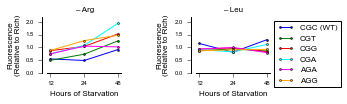

In [16]:
conditions = ['-Arg', '-Leu']
times = ['12', '24', '48']
variants = ['WT','CGT','CGG','CGA','AGA','AGG']

fig = plt.figure()

axcount = 0
for condition in conditions:
    axcount += 1
    ax = fig.add_subplot(1,2,axcount)
    for variant in variants:
        subset = np.logical_and(
        summarizedData['samplelabel'].apply(
            lambda label: label.find(variant) != -1
        ),
        summarizedData['samplelabel'].apply(
            lambda label: label.find(condition) != -1
        )
        )
        subsetdata = summarizedData[subset]
        x = range(len(subsetdata))
        y = subsetdata['normalizedMean']
        ax.plot(x, y, label = variant.replace('WT','CGC (WT)'),marker = 'o',markersize=2)
        
    spineOffset = {'left': 5, 'bottom': 0}   
    [ spine.set_position(('outward',spineOffset[loc])) 
         if loc in ['left','bottom'] else spine.set_color('none') 
         for loc, spine in ax.spines.items() ]         
    ax.xaxis.set( ticks_position = 'bottom')
    ax.yaxis.set( ticks_position = 'left')
    timepoints = map(lambda x: x.split('_')[-1], subsetdata.index)
    ax.xaxis.set(ticks = x, ticklabels = timepoints)
    ax.set_xlim(-0.1,max(x) + 0.1)
    ax.set_ylim(bottom = 0, top = 2.2)
    ax.yaxis.set( major_locator = MaxNLocator(5) )
    ax.set_xlabel('Hours of Starvation')
    ax.set_ylabel('Fluorescence\n(Relative to Rich)')
    if axcount == 2:
        ax.legend(loc = 2, bbox_to_anchor = (1,1))
    ax.set_title(condition.replace('-',u'– '))  
    
fig.set_size_inches([4,1])
fig.subplots_adjust(wspace = 1)
fig.savefig('../figures/20161025_hela__122448h_argvariants_mean.svg')
fig.savefig('../figures/20161025_hela__122448h_argvariants_mean.pdf',bbox_inches='tight')

## Plot raw data to determine appropriate FSC/SSC gates ##

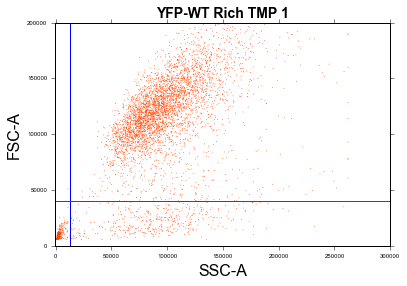

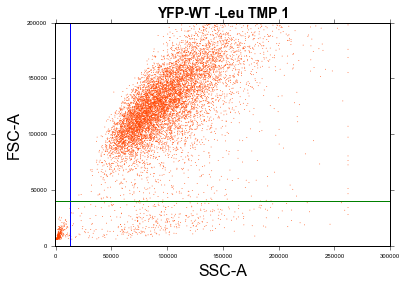

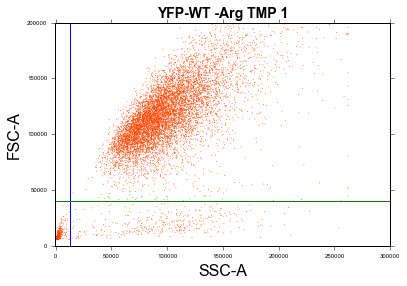

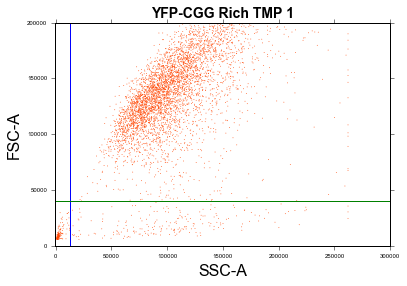

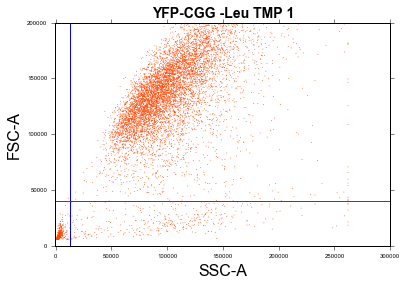

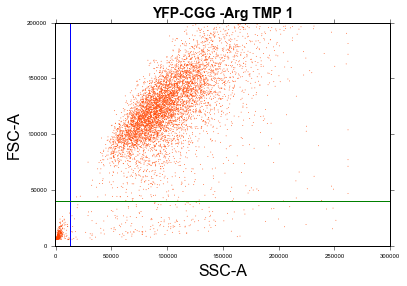

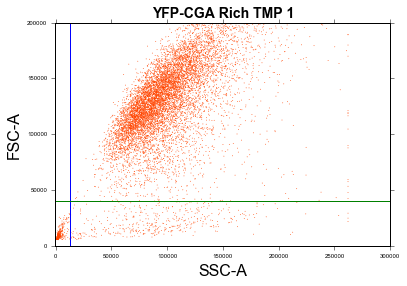

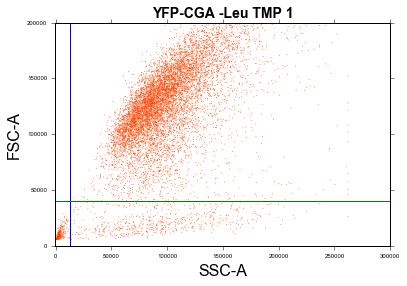

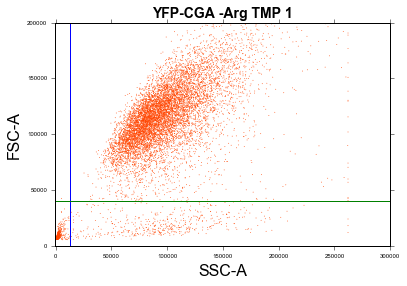

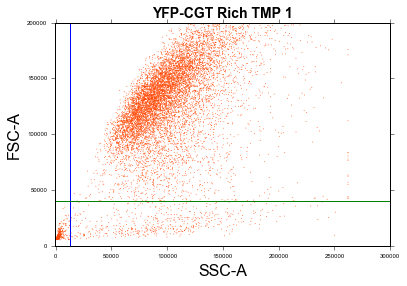

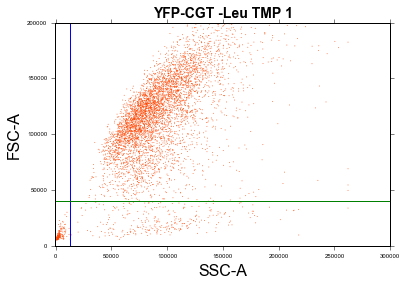

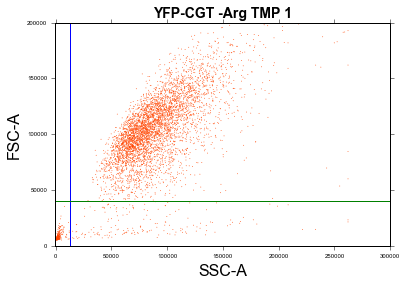

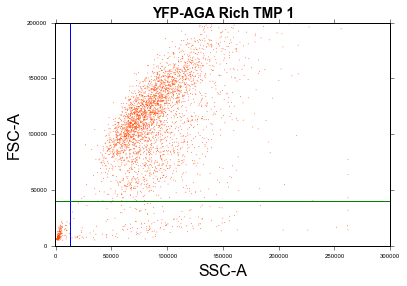

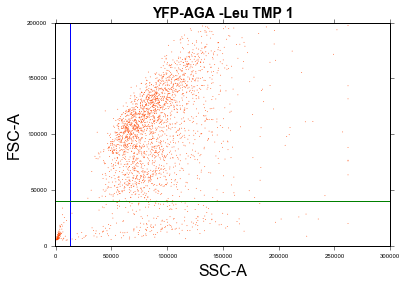

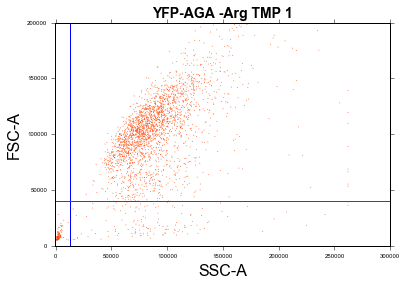

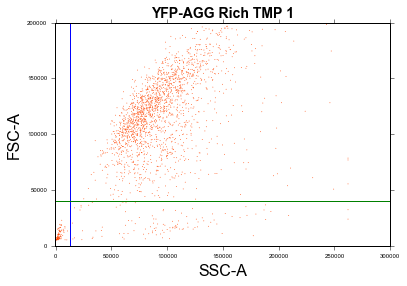

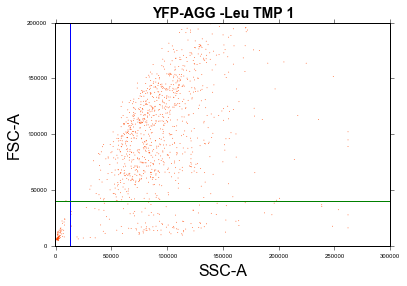

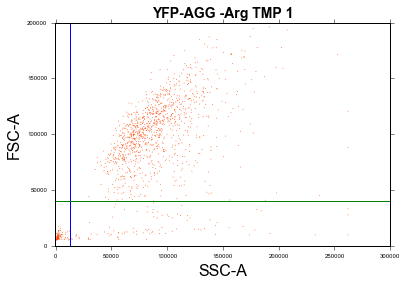

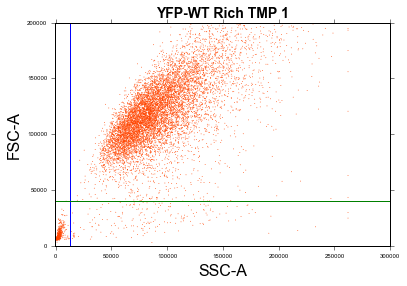

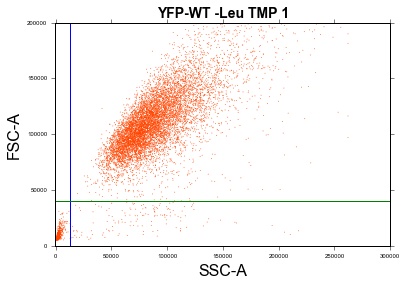

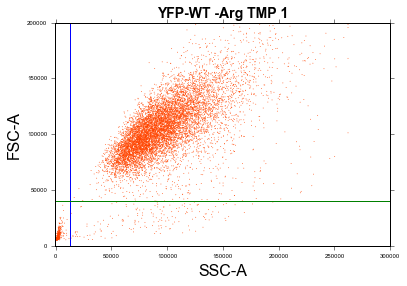

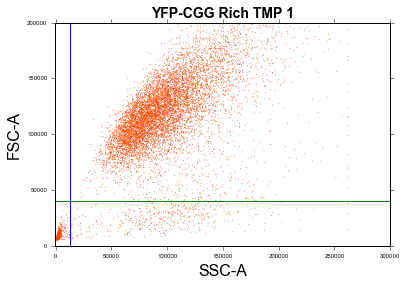

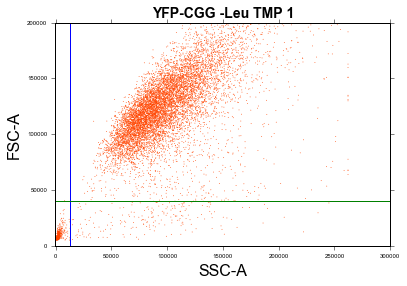

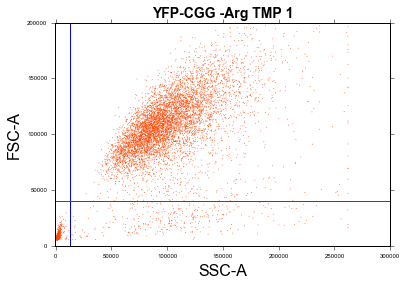

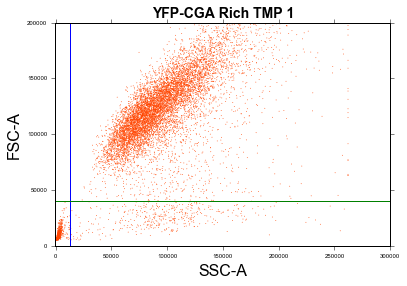

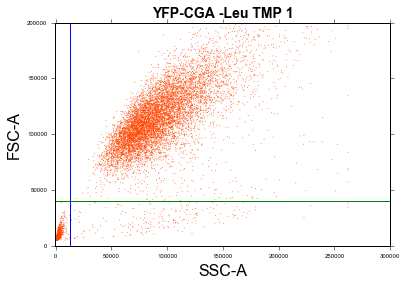

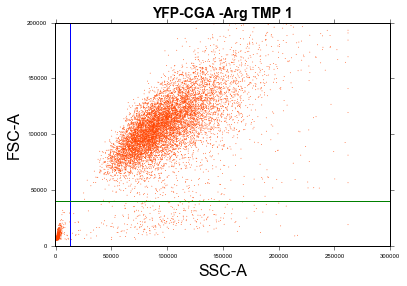

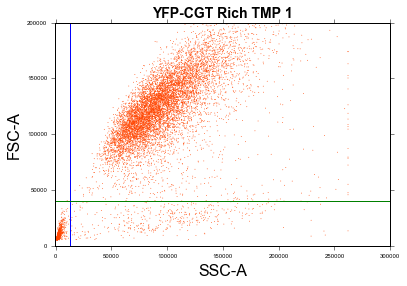

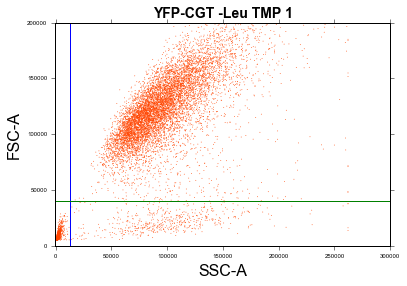

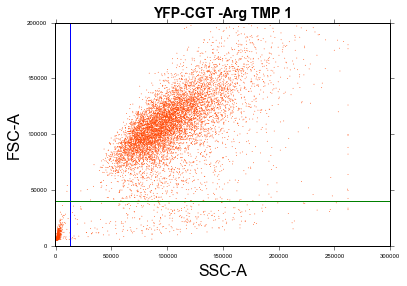

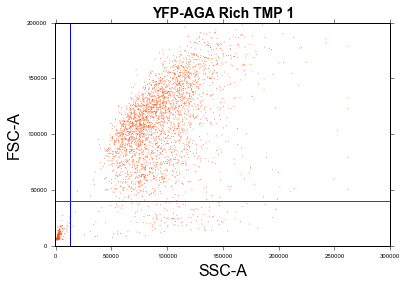

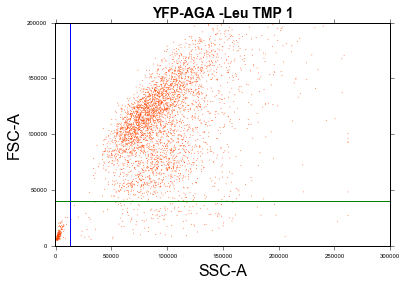

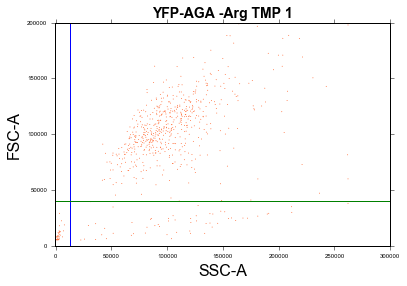

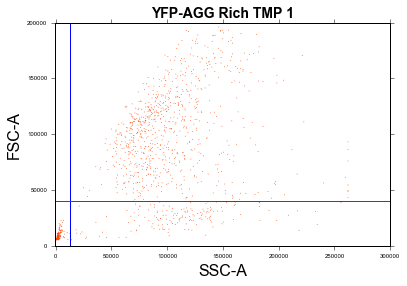

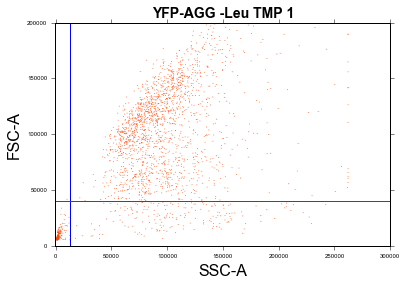

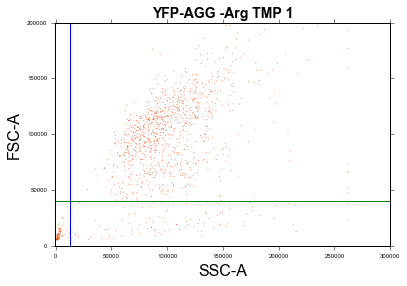

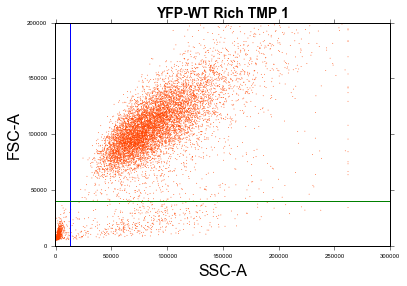

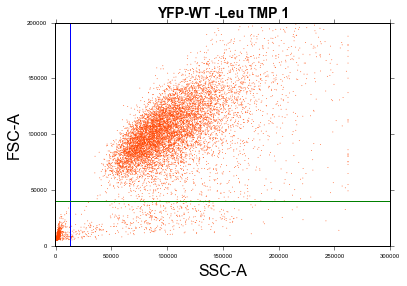

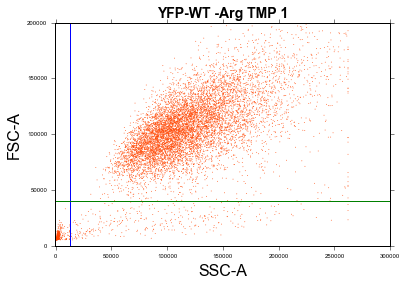

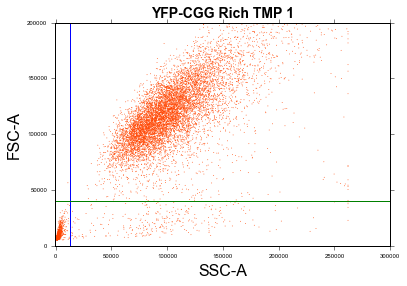

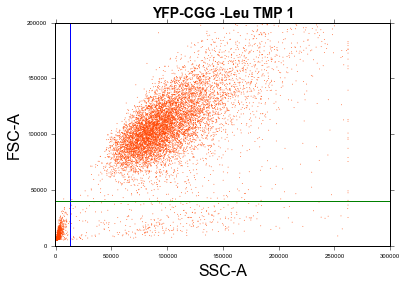

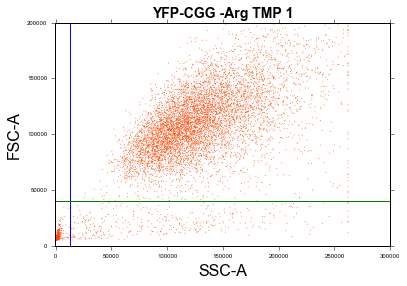

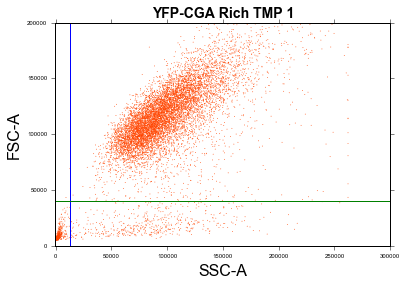

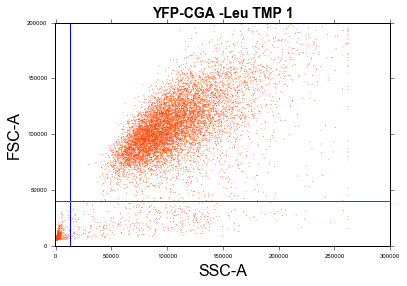

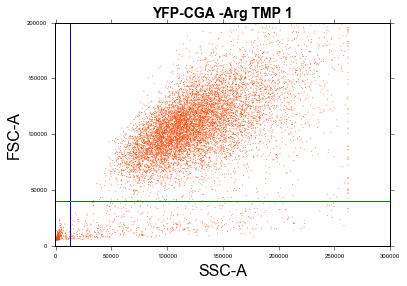

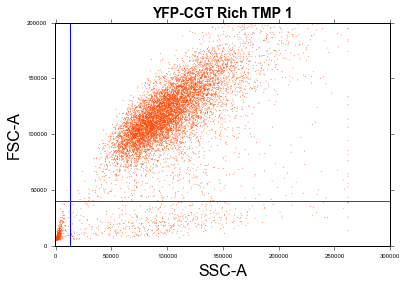

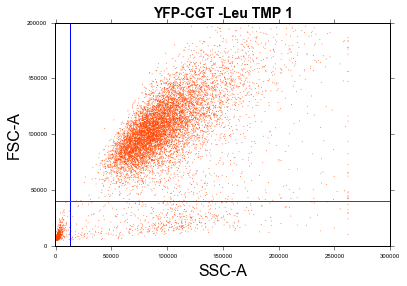

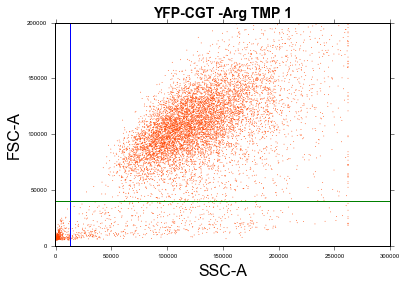

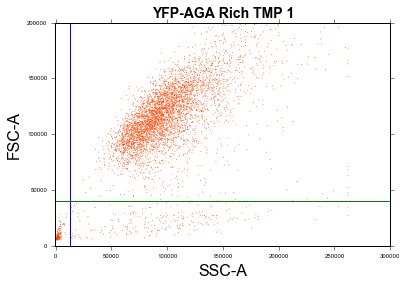

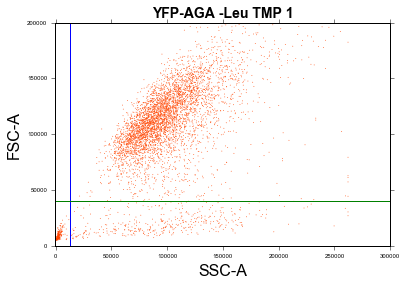

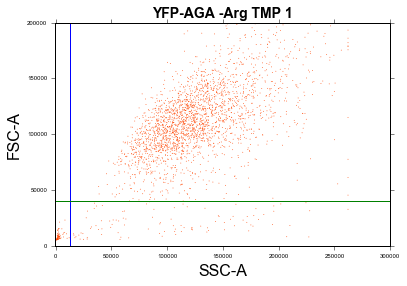

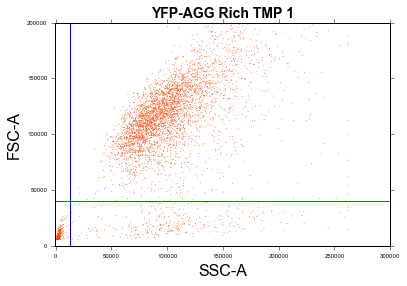

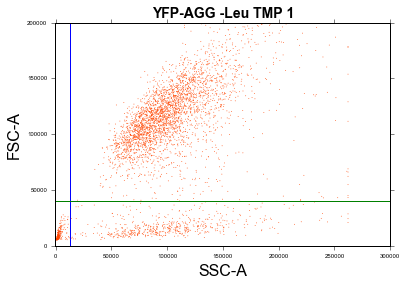

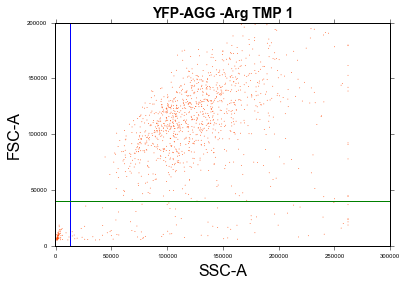

In [17]:
import os, FlowCytometryTools
from FlowCytometryTools import FCMeasurement
from FlowCytometryTools import ThresholdGate
from pylab import *

fcsFiles = !ls ../fcs_files/*.fcs

for File in fcsFiles:
    ID = int( File.split( '/' )[-1].split( '.' )[0].split('_')[-1] )
    sampleid = sampleids[ID]
    plotsample = FCMeasurement(ID= sampleid, datafile=File)
    #print plotsample.ID
    #print plotsample.channel_names  #names of lasers
    #print plotsample.channels  #useful: gives voltage values for all channels so I can keep this consisent 
    #print type(plotsample.data) #this is a pandas data frame with entries for fsc,ssc, and each laser, and time. 
    #print plotsample.data[['FITC-A', 'PE-A']][:10]  #this prints the 1st 10 entries in each column for FITC/mCherry values
    #plotdata = plotsample.data
    #print plotdata['FITC-A'].describe()   #this prints overall statistics about the data for this sample.
    #print plotdata['FITC-A'].median()
    #print plotdata['PE-A'].median()
    #print plotdata.shape[0] #how many events are in the data"tube"
    
    #define gates based on visual analysis of scatter plot
    fsc_gate = ThresholdGate(40000.0, 'FSC-A', region='above')
    ssc_gate = ThresholdGate(12500.0, 'SSC-A', region='above')
    
    tsample = plotsample.transform('hlog', channels=['FITC-A'], b=200)   # b controls the location where the transformation shifts from linear to log. The optimal value for this parameter depends on the range of your data. For smaller ranges, try smaller values of b. So if your population doesn’t show up well, just adjust b.
    axTitle = plotsample.ID
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_ylim(-100,200000)
    ax.set_xlim(-100,300000)
    ax.set_title( axTitle, fontsize=14, fontweight='bold')
    tsample.plot(['SSC-A', 'FSC-A'], kind='scatter', color='orangered', gates=[ssc_gate, fsc_gate], s=0.75, alpha = 0.95) #plots a 2d scatter plot. s value adjusts the weight of each point. alpha adjusts the transparency of each point between 1 and 0

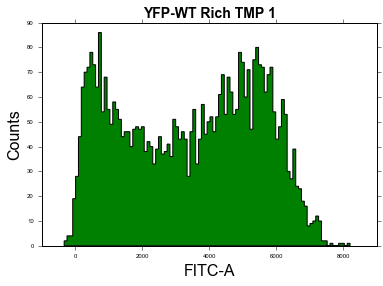

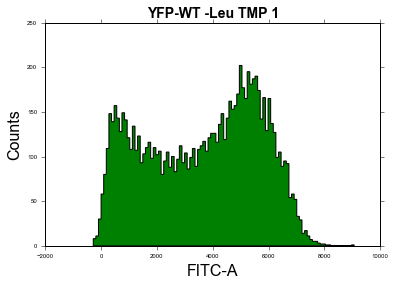

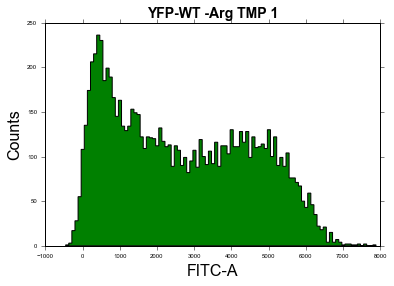

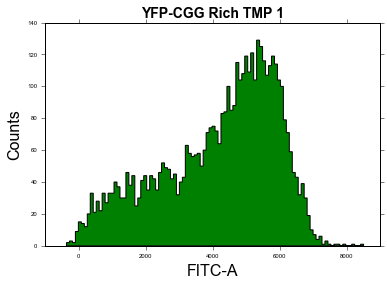

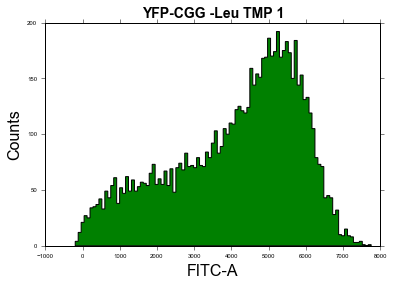

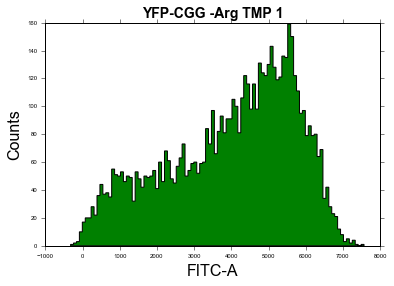

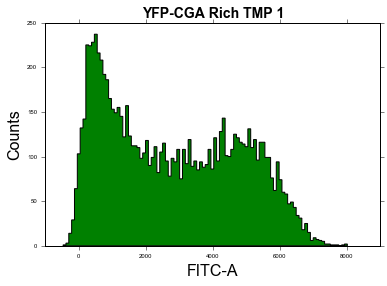

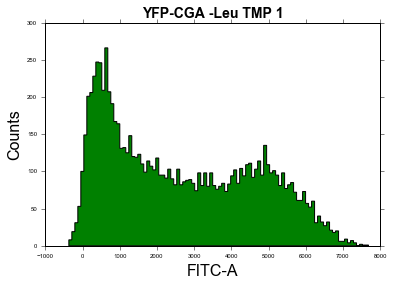

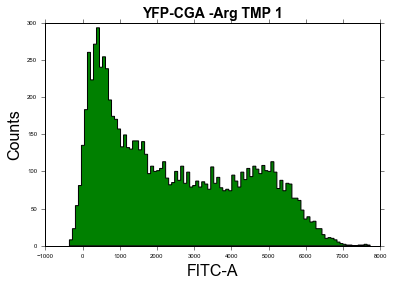

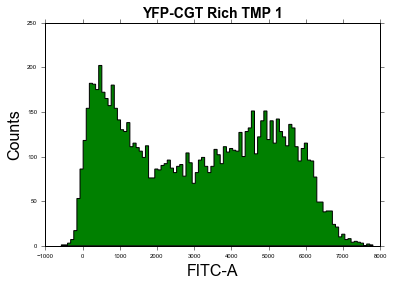

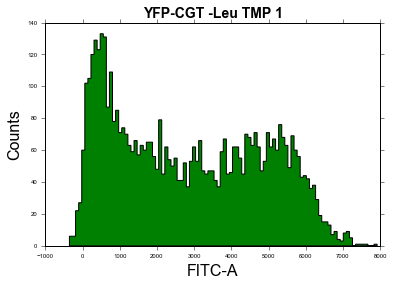

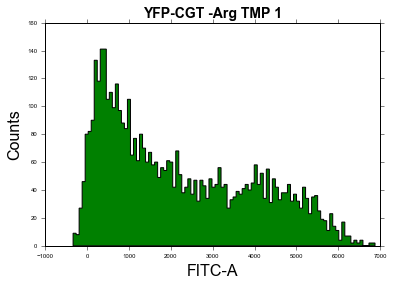

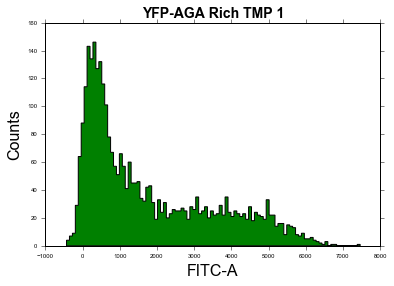

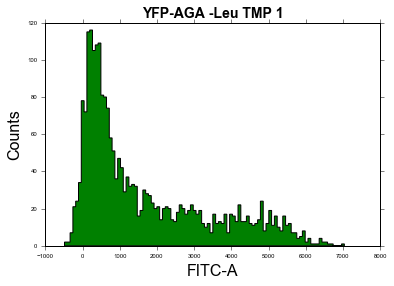

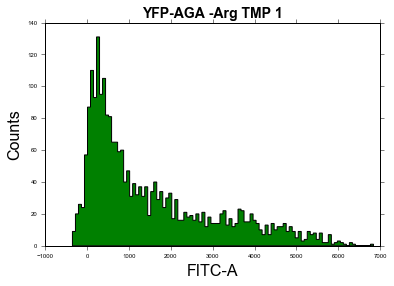

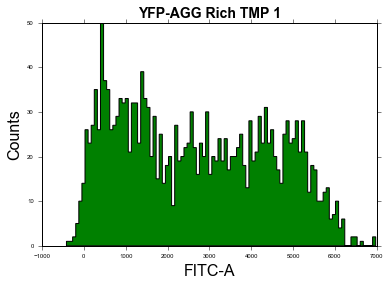

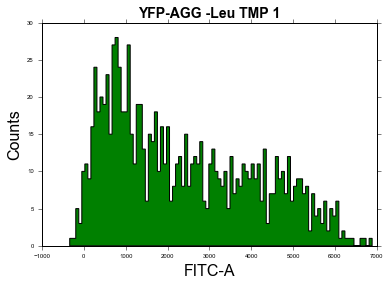

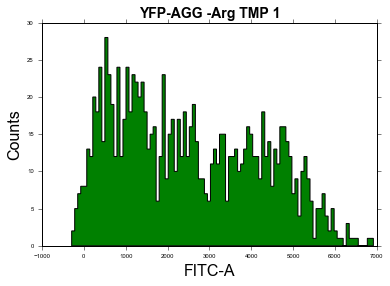

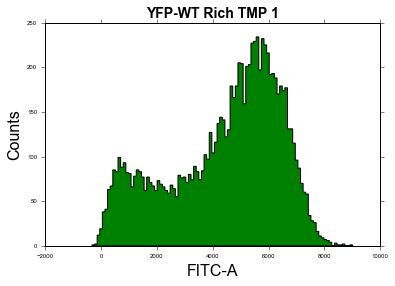

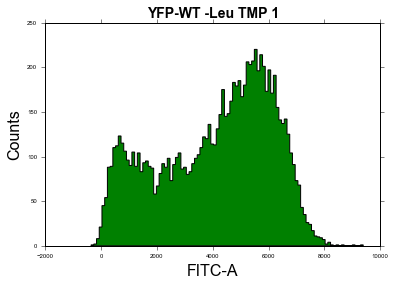

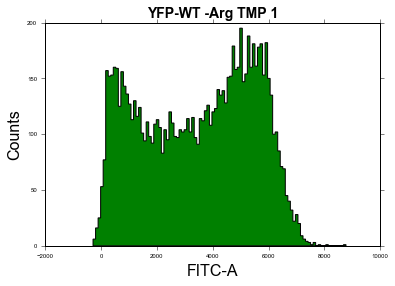

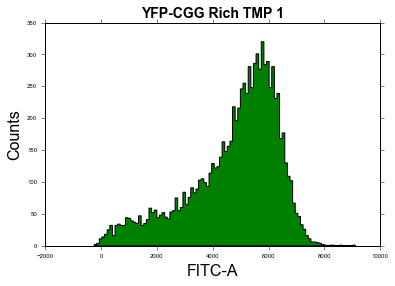

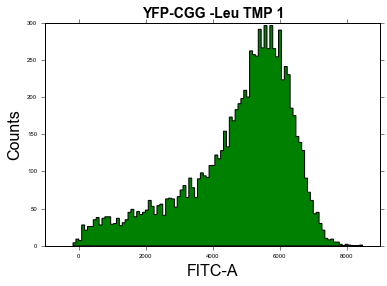

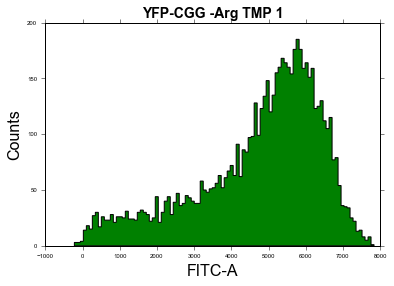

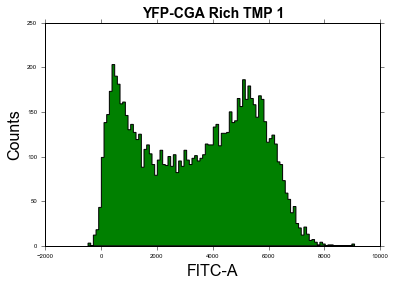

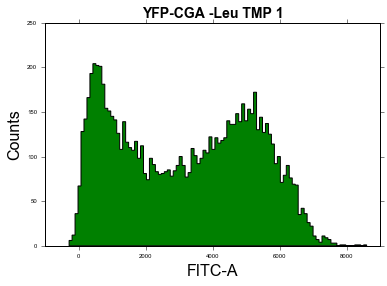

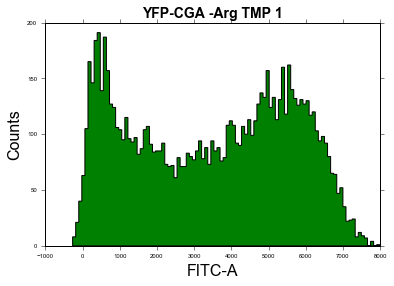

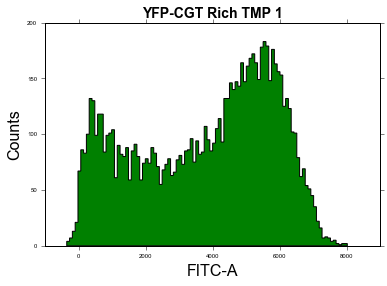

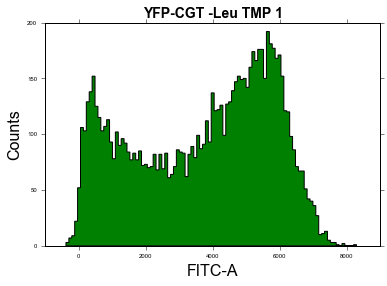

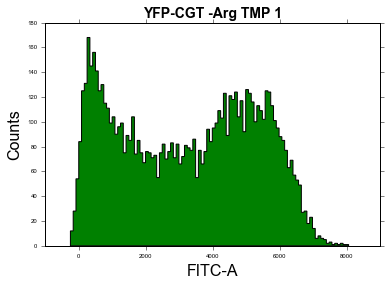

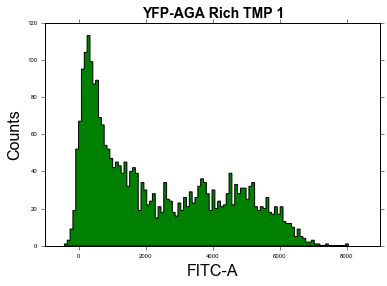

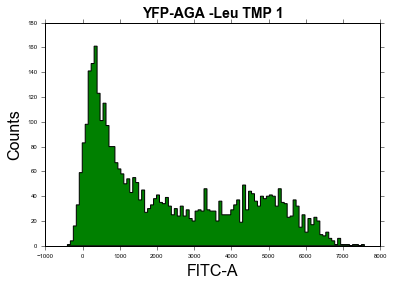

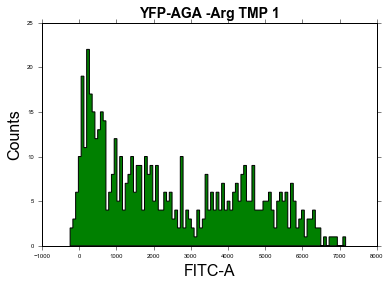

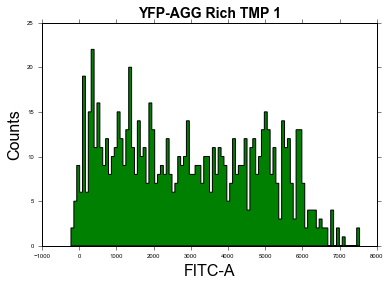

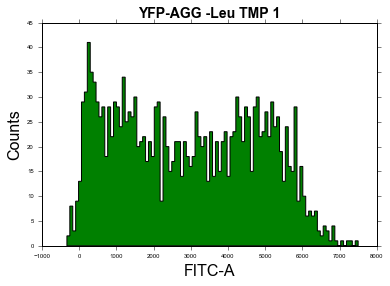

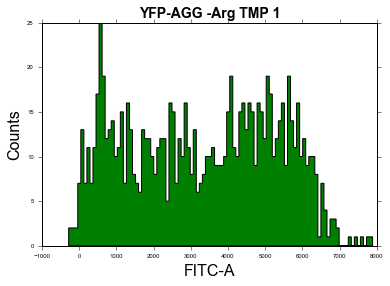

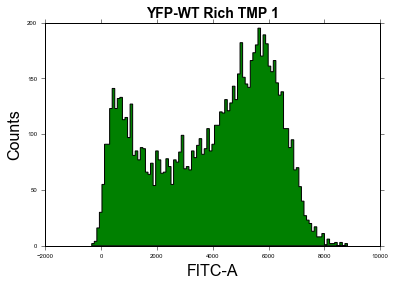

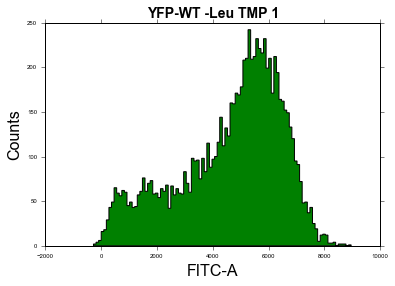

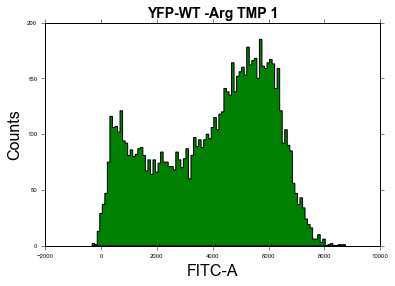

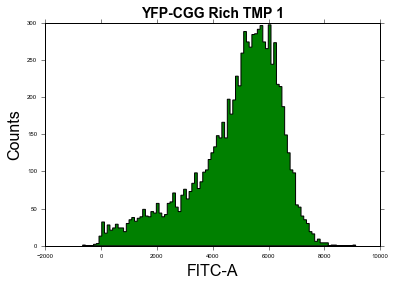

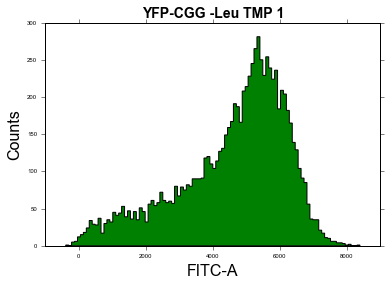

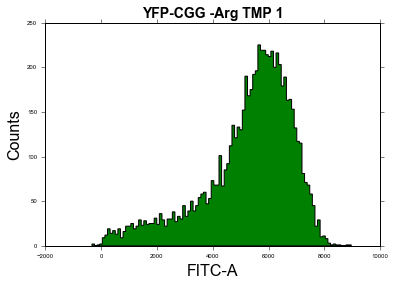

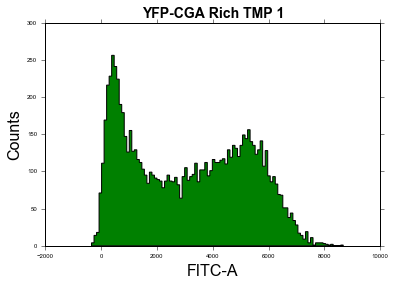

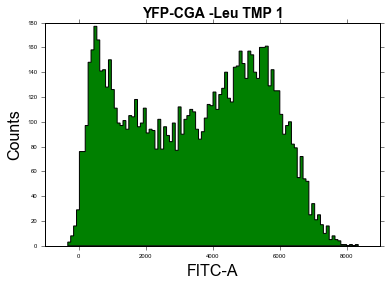

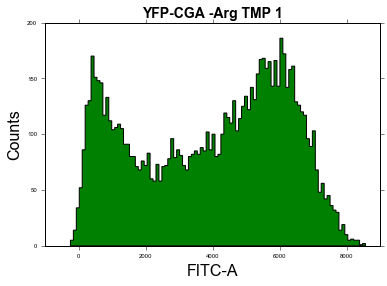

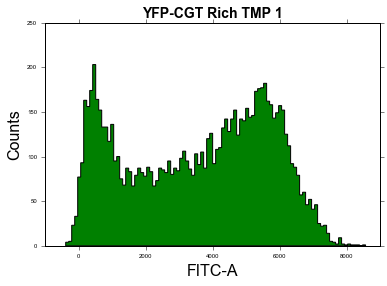

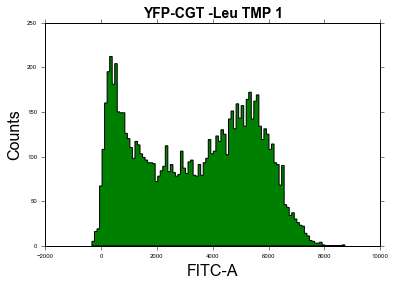

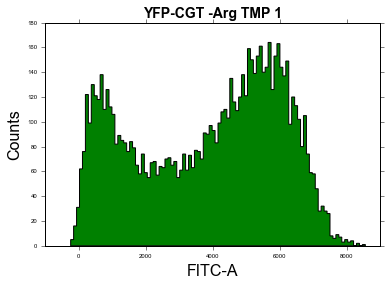

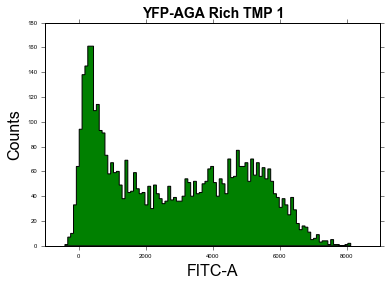

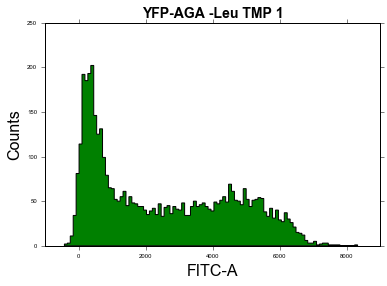

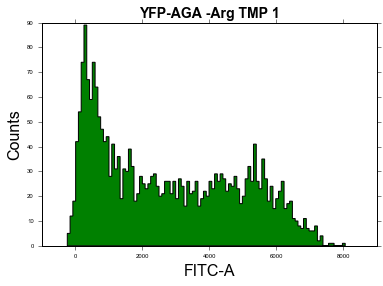

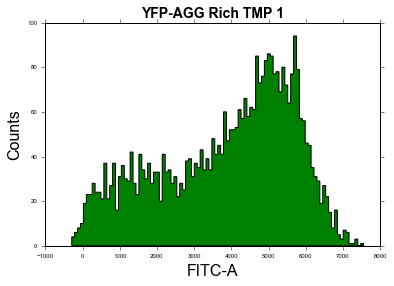

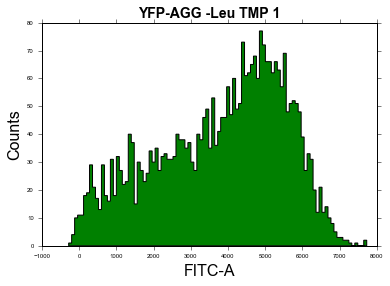

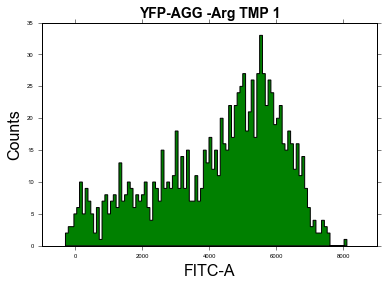

In [18]:
for File in fcsFiles:
    ID = int( File.split( '/' )[-1].split( '.' )[0].split('_')[-1] )
    sampleid = sampleids[ID]
    plotsample = FCMeasurement(ID= sampleid, datafile=File)
    
    #define gates based on visual analysis of scatter plot
    fsc_gate = ThresholdGate(40000.0, 'FSC-A', region='above')
    ssc_gate = ThresholdGate(12500.0, 'SSC-A', region='above')
    
    tsample = plotsample.transform('hlog', channels=['FITC-A'], b=200)   # b controls the location where the transformation shifts from linear to log. The optimal value for this parameter depends on the range of your data. For smaller ranges, try smaller values of b. So if your population doesn’t show up well, just adjust b.
    axTitle = plotsample.ID
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title( axTitle, fontsize=14, fontweight='bold')
    gated_sample = tsample.gate(fsc_gate,ssc_gate)
    gated_sample.plot('FITC-A', color='green', bins=100) #plots a 1D histogram of FITC